### Image retrieval on MPEG7

In [1]:
import numpy as np 
from PIL import Image
import os

### load image, resize image, create label based on filename

In [2]:
def load_image_from_folder(folder):
    images = []
    filenames = []
    y = []
    category, idx = "none", 0
    for filename in sorted(os.listdir(folder)):
        if filename.endswith(".gif"):
            image = Image.open(os.path.join(folder, filename))
            image = image.resize((32, 32), Image.ANTIALIAS)
            if image is not None:
                images.append(image)
                filenames.append(filename)
                if filename.startswith(category):
                    y.append(idx)
                else:
                    category = filename.split('-')[0]
                    idx = idx + 1
                    y.append(idx)                    
    return images, filenames, y

In [3]:
folder = "/home/jovyan/share/MPEG7"
images, filenames, y = load_image_from_folder(folder)
print(len(images), len(filenames), len(y))

1402 1402 1402


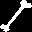

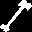

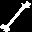

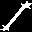

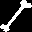

In [4]:
from IPython.display import display
for i in range(5):
    display(images[i])

### Convert each image to a vector and store whole dataset in a 2d numpy array

In [5]:
tmp = []
for image in images:
    im = np.asarray(image)
    im = im.reshape((1024,))
    tmp.append(im)
imgs_array = np.array(tmp)
y = np.array(y)

### Splite dataset into Training (gallery) and Testing (Query/Probe)

In [7]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(imgs_array, y, test_size=0.2, random_state=42)

### Testing: for each probe image
- Calculate the distance to all gallery images
- Rank all the distance
- Display the most similar images

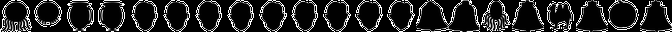

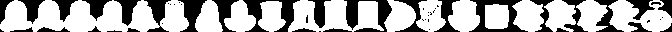

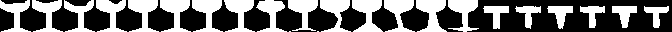

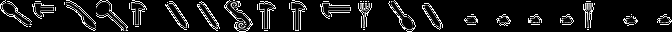

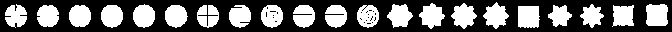

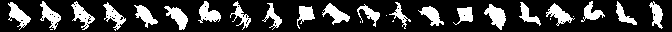

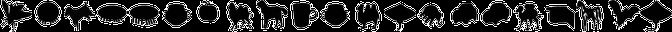

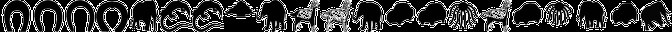

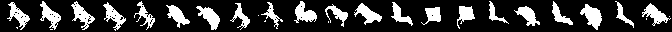

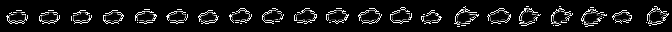

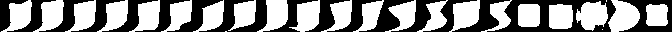

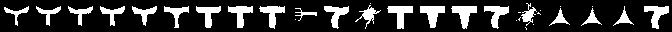

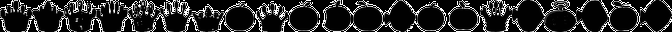

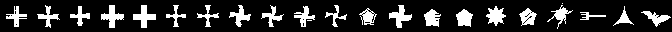

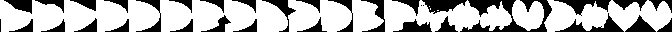

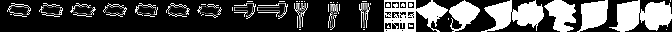

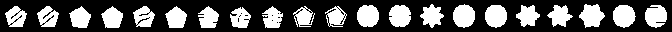

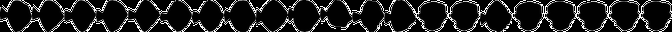

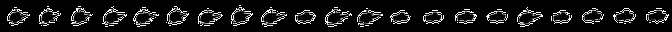

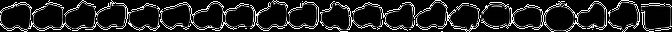

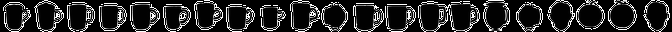

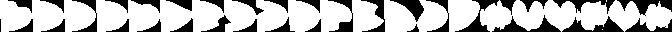

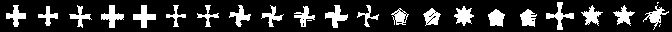

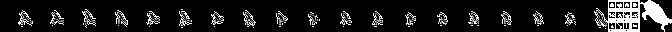

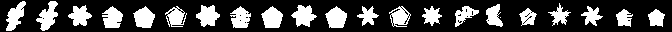

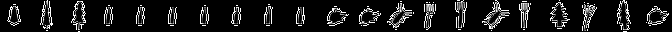

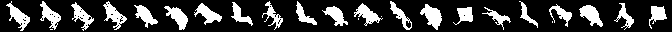

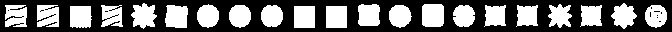

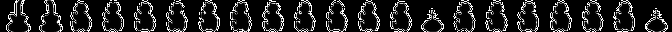

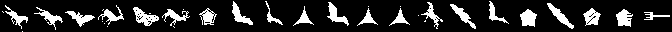

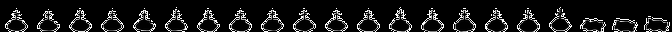

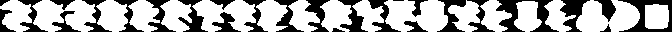

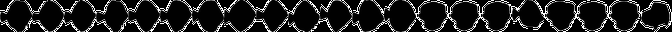

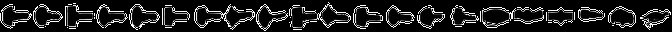

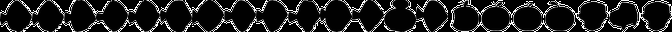

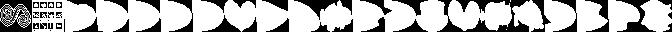

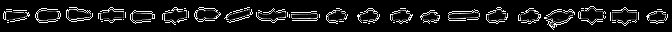

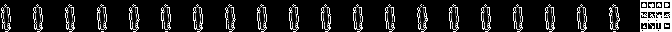

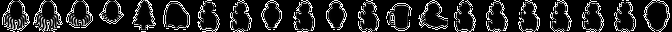

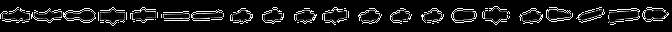

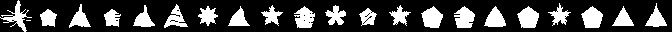

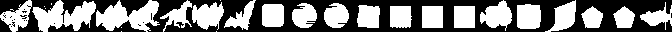

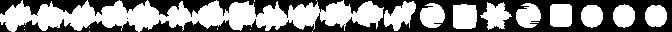

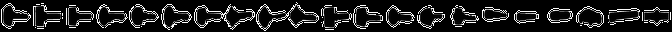

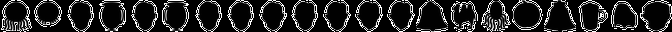

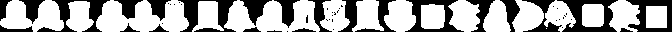

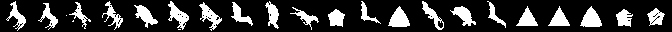

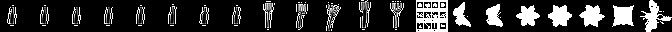

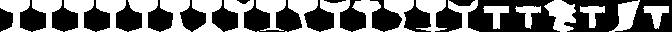

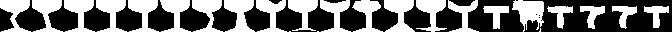

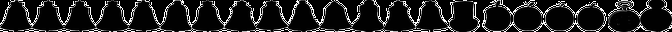

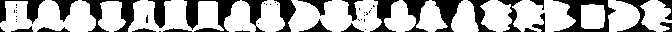

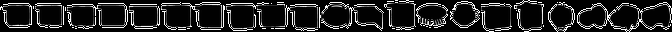

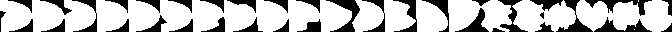

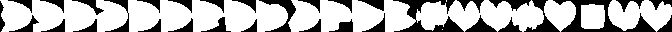

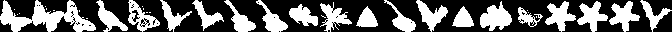

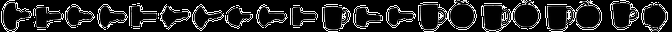

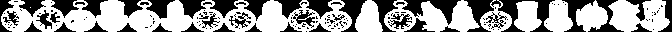

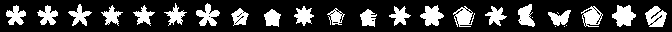

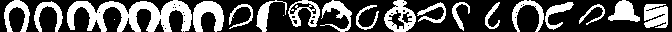

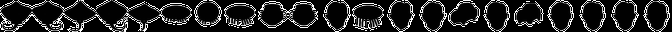

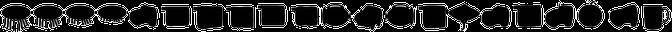

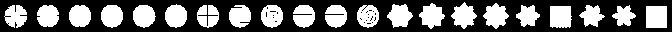

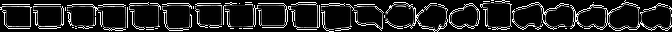

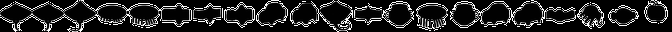

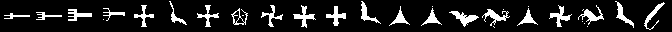

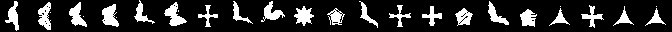

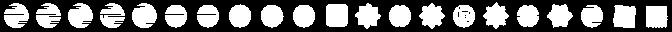

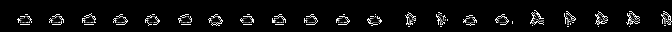

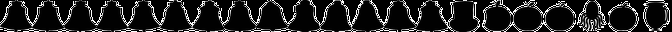

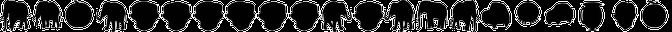

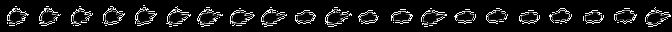

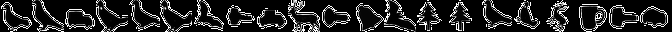

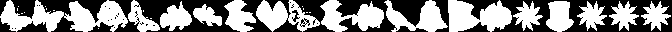

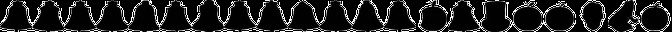

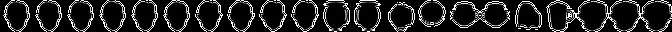

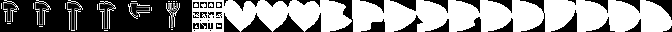

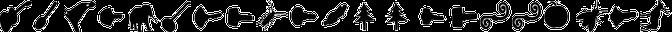

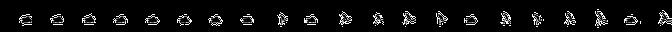

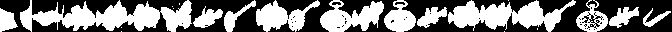

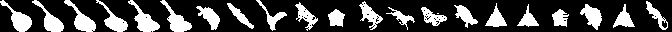

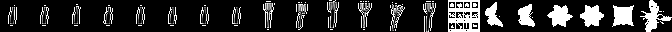

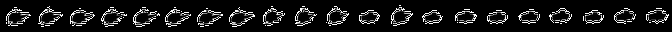

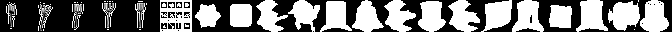

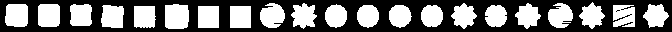

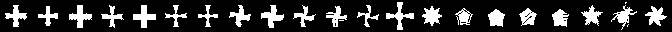

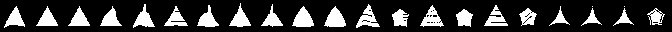

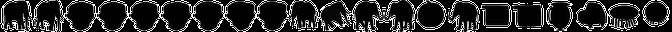

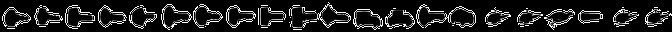

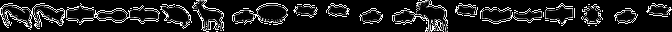

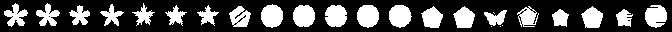

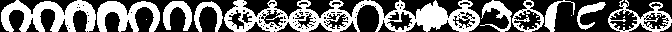

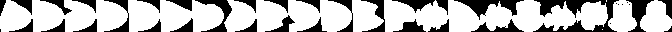

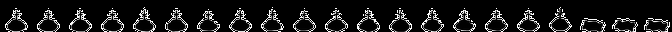

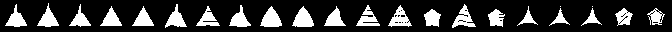

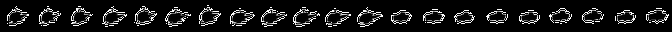

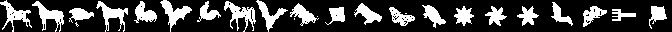

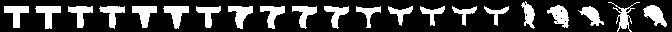

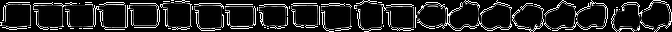

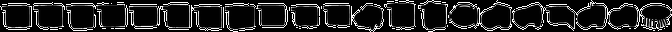

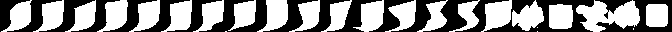

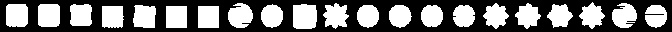

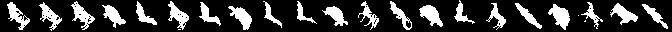

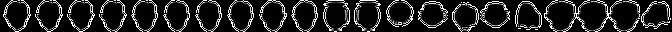

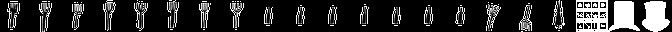

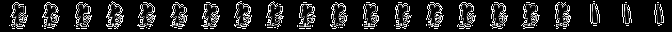

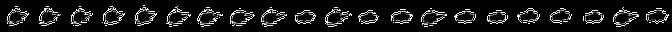

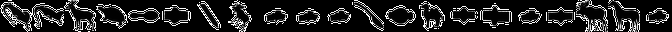

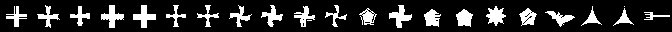

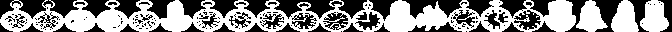

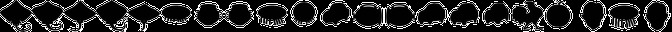

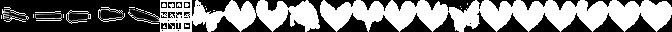

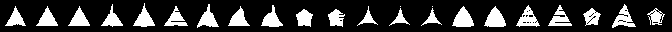

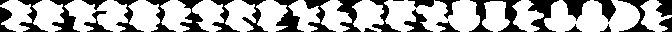

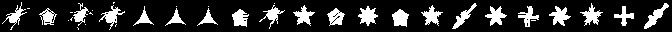

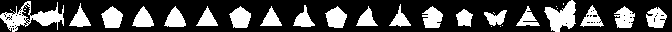

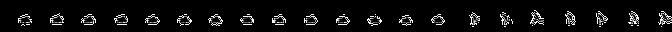

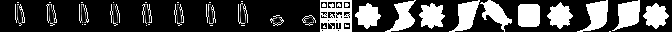

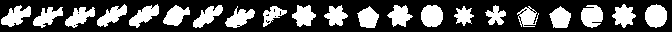

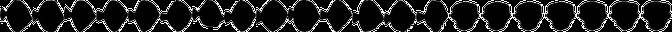

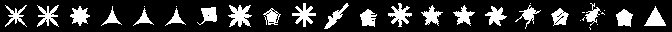

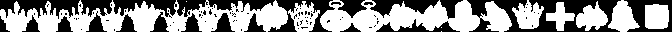

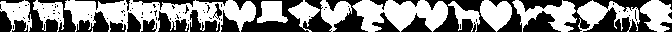

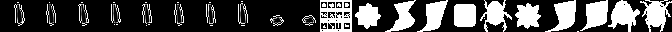

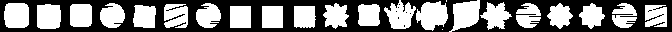

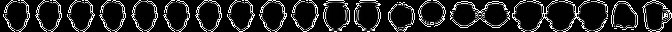

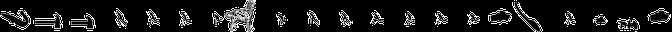

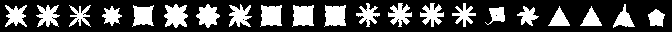

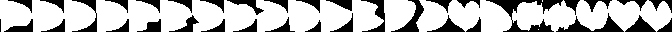

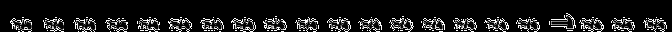

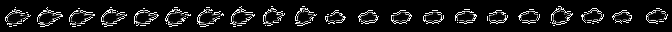

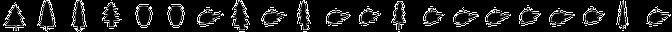

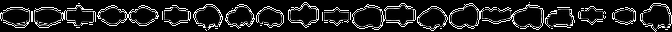

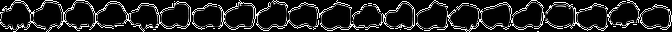

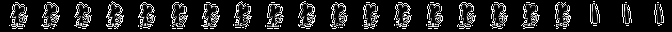

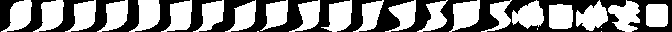

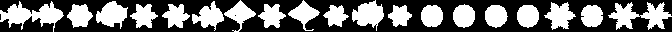

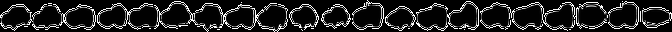

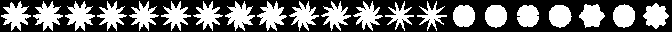

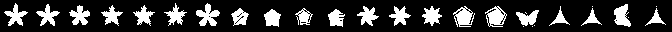

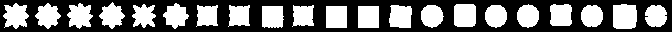

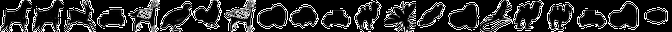

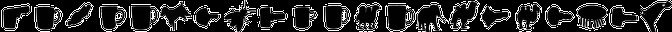

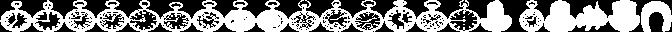

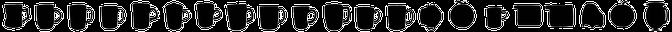

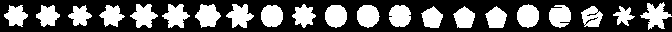

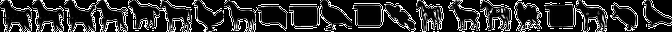

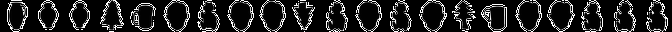

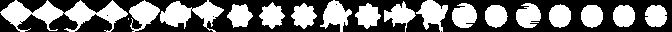

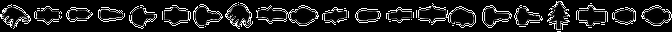

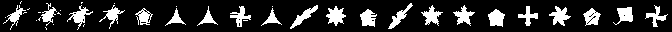

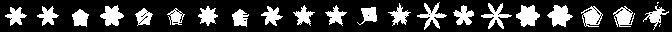

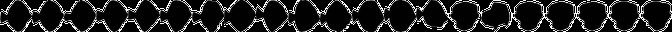

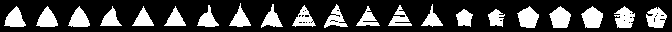

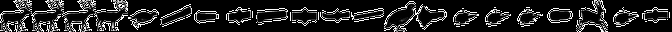

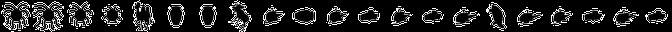

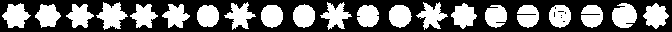

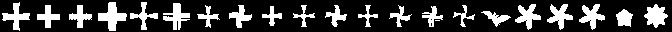

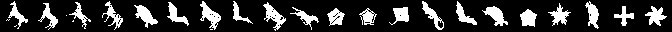

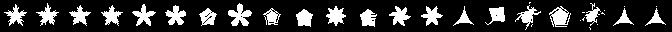

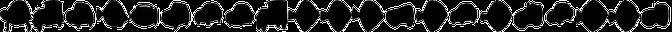

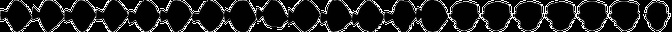

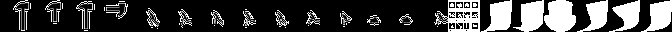

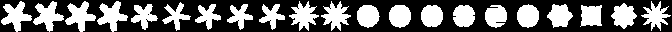

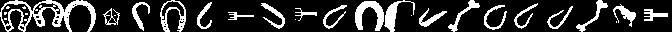

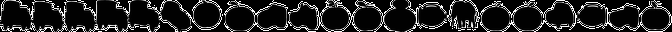

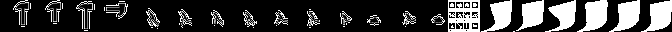

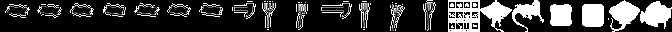

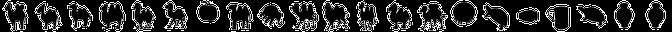

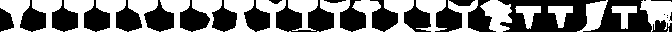

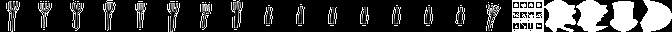

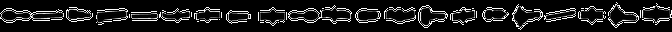

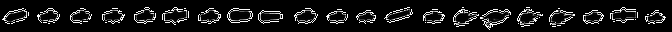

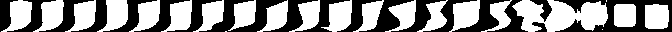

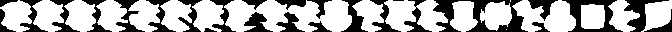

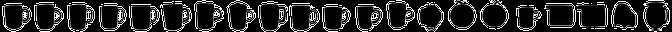

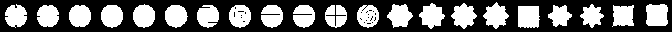

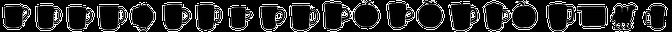

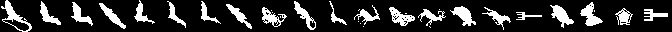

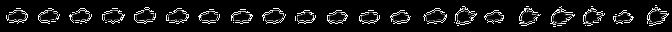

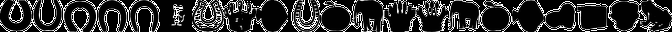

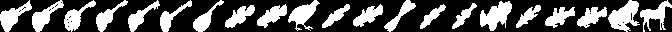

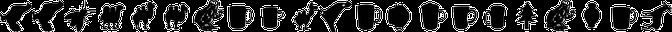

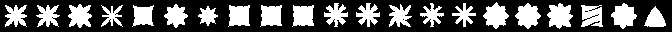

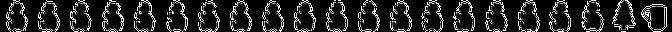

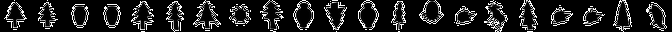

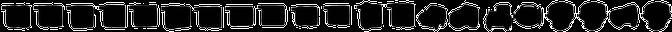

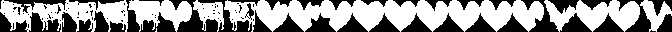

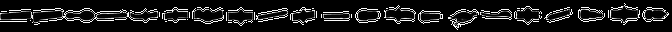

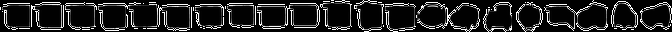

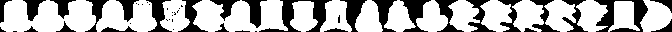

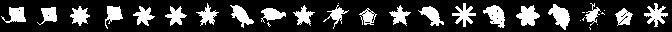

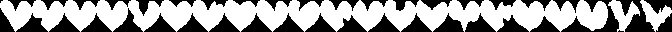

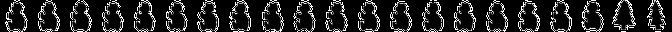

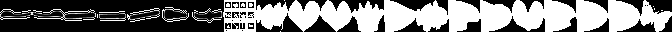

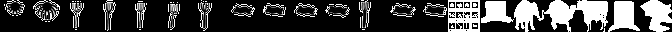

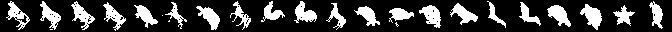

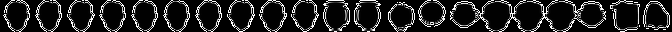

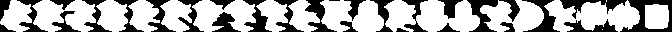

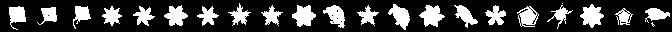

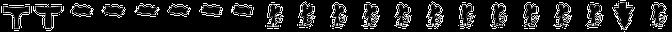

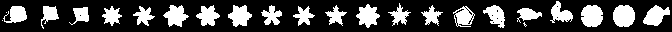

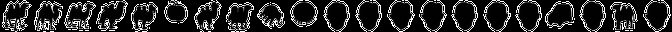

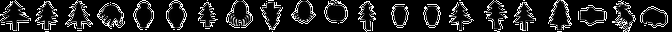

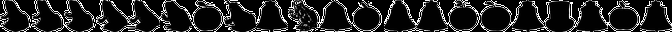

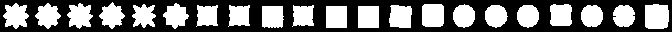

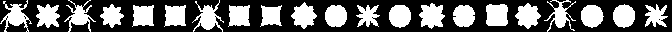

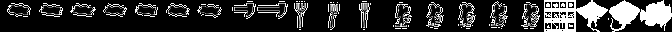

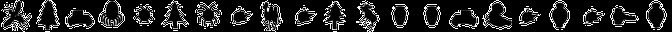

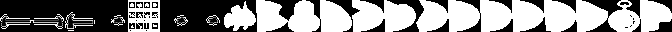

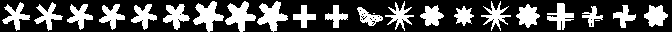

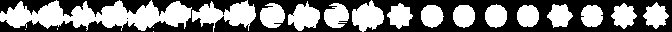

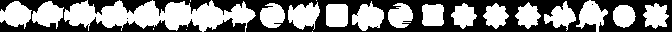

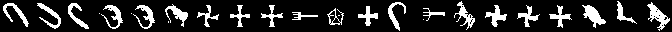

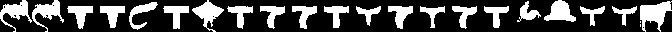

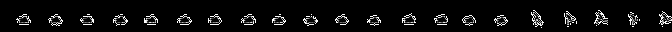

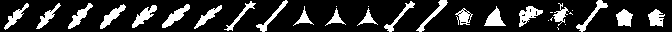

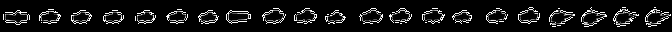

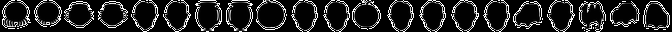

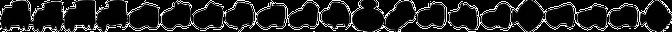

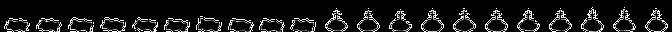

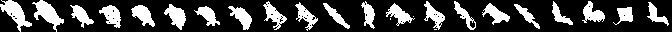

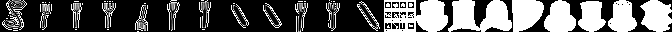

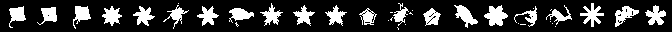

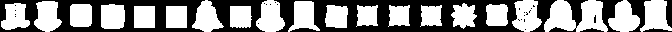

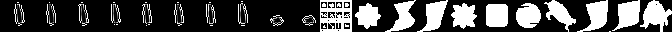

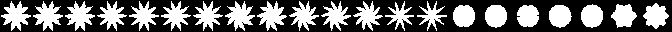

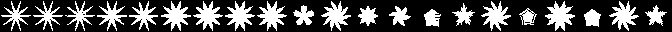

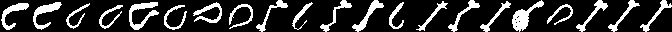

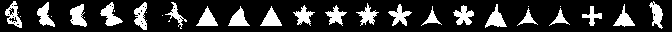

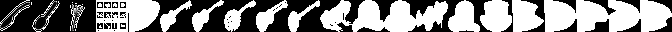

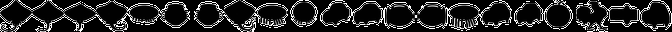

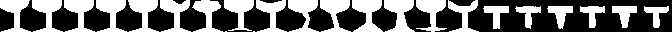

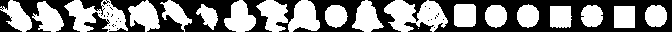

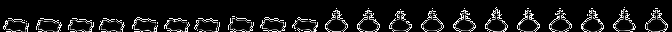

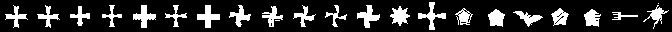

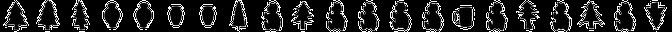

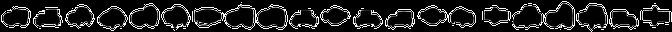

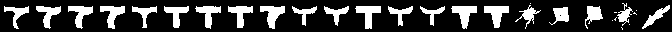

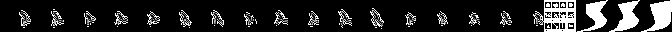

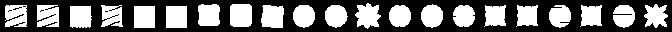

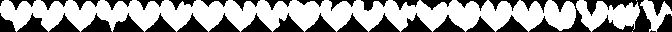

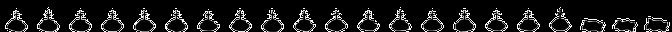

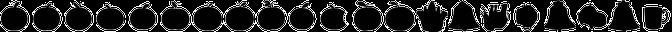

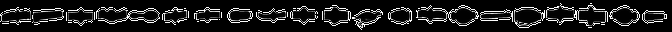

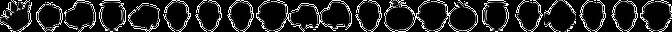

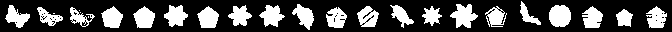

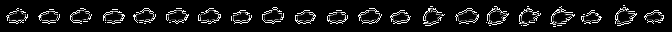

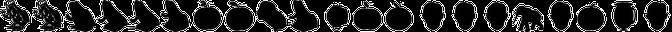

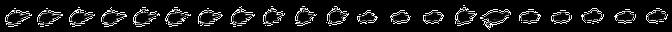

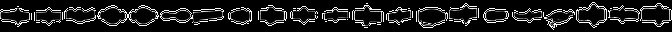

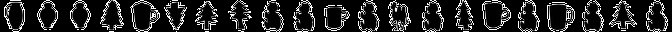

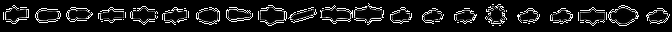

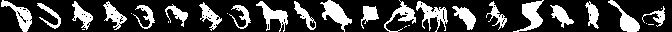

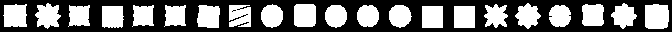

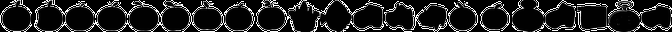

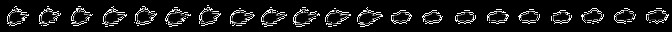

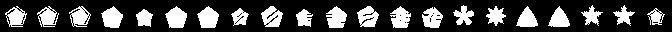

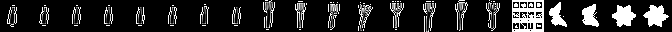

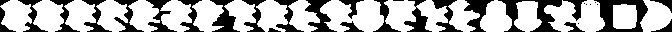

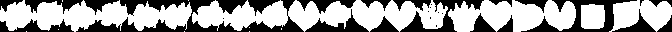

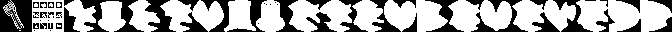

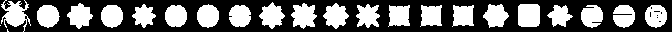

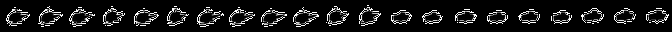

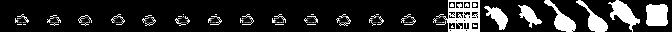

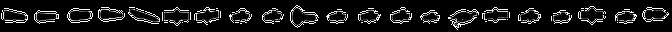

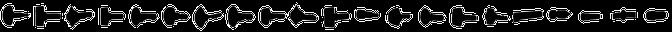

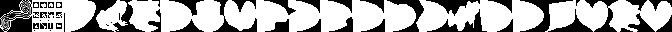

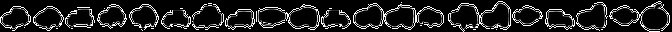

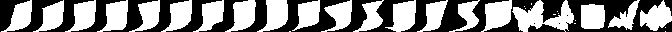

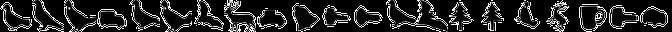

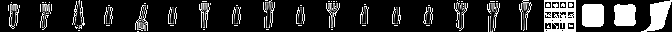

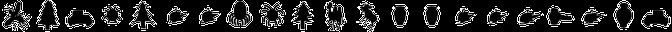

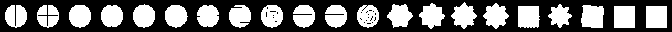

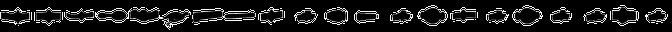

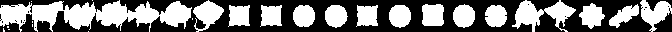

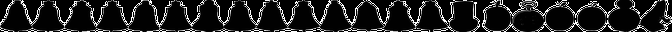

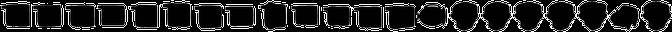

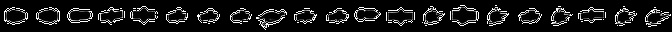

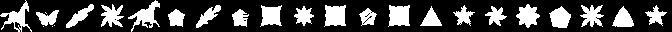

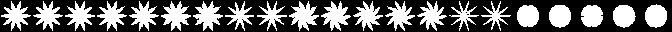

In [8]:
from sklearn.metrics.pairwise import euclidean_distances

for idx, query in enumerate(X_test):
    query = query.reshape((1, -1))
    D = euclidean_distances(X_train, query).squeeze()
    index = np.argsort(D)
    index = index[:20]
    tmp = [query.reshape((32,32))]
    for ind in index:
        tmp.append(X_train[ind].reshape((32,32)))
    output = np.array(tmp)*255
    output = output.transpose(1, 0, 2)
    output = output.reshape((32, -1))
    im_query = Image.fromarray(output)
    display(im_query)   
